# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [133]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [134]:
# load the Iris dataset using statmodels
iris = sm.datasets.get_rdataset('iris', 'datasets')

# convert the data into a pandas DataFrame
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [135]:
X='Sepal.Width'
Y='Sepal.Length'

In [136]:
# define alpha function based on the covariance of Sepal.Width and Sepal.Length
def alpha_func(D, idx):
    cov_ = np.cov(D[[X,Y]].loc[idx], rowvar=False)
    return ((cov_[1,1] - cov_[0,1]) /
            (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [137]:
# calculate original alpha using the alpha_func for the original dataset
alpha_original = alpha_func(df, range(len(df)))
print(alpha_original)

0.7580390244311441


_(ii)_ Construct a new bootstrap data set and recompute alpha

In [146]:
# construct one new bootstrap sample and recompute alpha with a fixed seed of 0
rng = np.random.default_rng(0)
alpha_bootstrap = alpha_func(df, rng.choice(len(df), len(df), replace=True))
print(alpha_bootstrap)

0.8116994146413992


Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

_(iii)_ Simply calculating the mean of Sepal.Length, will provide a single value estimate of the length of the petals. However, it does not give us information about the variability of the estimate. Bootstrapping allows us to understand the distribution of the mean, giving us an estimate of the standard error, which indicates the precision of the mean.

In [139]:
# define bootstrapping standard error function

bootstrap_values = [] # a list to save all outputs
def boot_SE(D, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    n =D.shape[0] # how many observations in the original dataset
    for i in range(B):
        idx = rng.choice(D.index, n, replace=True)
        value = alpha_func(D, idx) 
        bootstrap_values.append(value) # a list of all outputs (alpha estimates), len(bootstrap_values == B)
    return np.std(np.array(bootstrap_values)) # compute standard deviation from a list of array (converting a list to array and compute standard deviation)

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [140]:
# evaluate the accuray of alpha with B = 1000
alpha_SE = boot_SE(df, B=1000, seed=0)
alpha_SE

0.03180510076860767

_(vi)_ What is the original mean value of `Sepal.Length`? 5.84

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [141]:
# calculate the original mean value of Sepal.Length
mean_of_sepal_length = df['Sepal.Length'].mean()
print(mean_of_sepal_length)


5.843333333333334


In [142]:
# function to generate bootstrap samples and compute the mean and standard error for Sepal.Length

bootstrap_means = [] # initialize a list to save all bootstrap outputs
n =df.shape[0] # number of observations in the original dataset
B=1000 #number of bootstrap samples
for i in range(B): # generate bootstrap samples with replacement and compute their means
    bootstrap_sample = np.random.choice(df['Sepal.Length'], n, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

bootstrap_means = np.array(bootstrap_means) #convert the list of bootstrap means to a numpy array for easier manipulation

bootstrap_mean = np.mean(bootstrap_means) # compute the mean of the bootstrap sample means
standard_error = np.std(bootstrap_means, ddof=1) # compute the standard error of the bootstrap sample means

print(f"Bootstrap Mean: {np.mean(bootstrap_mean)}")
print(f"Standard Error: {np.std(standard_error)}")


Bootstrap Mean: 5.84151
Standard Error: 0.0


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [143]:
# compute the 95% confidence interval using percentile
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")

95% Confidence Interval: (5.717300000000001, 5.969383333333333)


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

In [144]:
bins = int(np.sqrt(n))
print(bins)

12


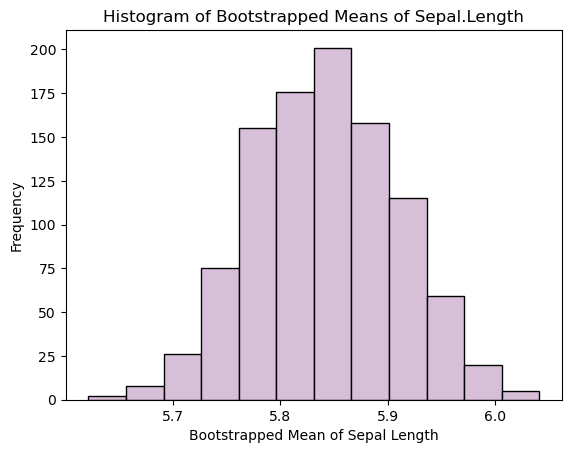

In [145]:
#create the histogram of the bootstrapped samples

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(bootstrap_means, bins=12, color='thistle', edgecolor='black')

# Add a title
ax.set_title ('Histogram of Bootstrapped Means of Sepal.Length')

# Add a label to the x-axis
ax.set_xlabel('Bootstrapped Mean of Sepal Length')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

The histogram displays the distribution of the means calculated from bootstrap samples. The central peak of the histogram displays the bootstrap estimate of the mean for Sepal Length, while the spread around this peak illustrates the variability of the estimate.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [x ] Created a branch with the correct naming convention.
- [x ] Ensured that the repository is public.
- [x ] Reviewed the PR description guidelines and adhered to them.
- [x ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
